<a href="https://colab.research.google.com/github/jhhatori808/UHWO_DATA342/blob/main/DATA_342_Fall_2025_Lab_1_Desc_Statistics_jh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 1**: Using Descriptive Statistics to Evaluate Daily Returns between First Hawaiian Bank and Bank of Hawaii

Step 1: Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 2: Install Required Libraries

In [5]:
!pip install openpyxl matplotlib pandas

Step 3: Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Step 4: Load the Excel File

In [9]:
import requests
import pandas as pd

file_id = '12HEJ-3ti7wmWaDsh6kD8hoW_0fhJ7xox'
url = f'https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('DATA_342_FALL_2025_Lab_1.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('DATA_342_FALL_2025_Lab_1.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")

Step 5: Display Sample Rows

In [10]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close   Daily Return
0 2024-01-02    FHB       21.07           NaN
1 2024-01-03    FHB       20.51     -0.026578
2 2024-01-04    FHB       20.66      0.007314
3 2024-01-05    FHB       20.49     -0.008228
4 2024-01-08    FHB       20.60      0.005368


Step 6: Clean and Format the Data

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])   # Remove rows with missing returns

Step 7: Separate FHB and BOH Data

In [12]:
fhb_df = df[df['Ticker'] == 'FHB'].copy()
boh_df = df[df['Ticker'] == 'BOH'].copy()

Step 8: Display Sample Rows

In [13]:
print("\nFHB Daily Returns:")
print(fhb_df[['Date', 'Adj Close\xa0', 'Daily Return']].head())

print("\nBOH Daily Returns:")
print(boh_df[['Date', 'Adj Close\xa0', 'Daily Return']].head())


FHB Daily Returns:
        Date  Adj Close   Daily Return
1 2024-01-03       20.51     -0.026578
2 2024-01-04       20.66      0.007314
3 2024-01-05       20.49     -0.008228
4 2024-01-08       20.60      0.005368
5 2024-01-09       20.34     -0.012621

BOH Daily Returns:
          Date  Adj Close   Daily Return
251 2024-01-02       66.76      1.657643
252 2024-01-03       64.24     -0.037747
253 2024-01-04       64.26      0.000311
254 2024-01-05       64.81      0.008559
255 2024-01-08       64.75     -0.000926


Step 9: Visualize Daily Returns with Box and Whisker Plots

/tmp/ipython-input-3194601794.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fhb_df['Daily Return'], boh_df['Daily Return']], labels=['FHB', 'BOH'])


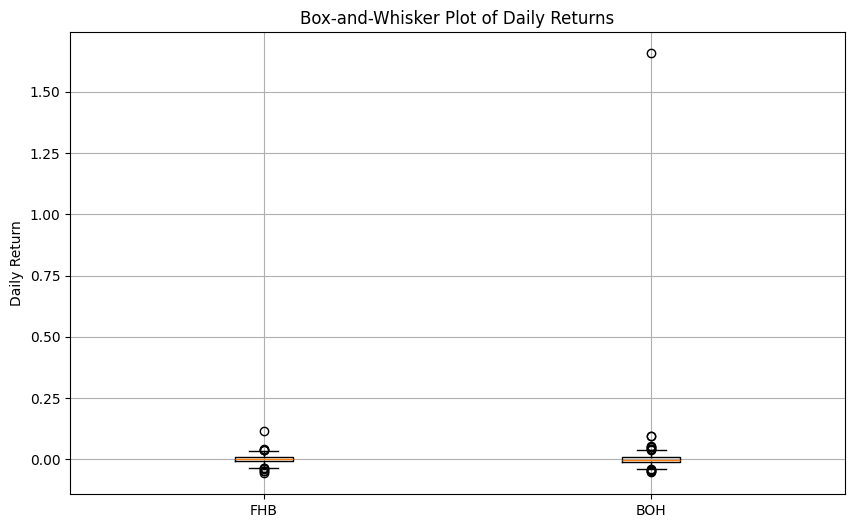

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot([fhb_df['Daily Return'], boh_df['Daily Return']], labels=['FHB', 'BOH'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()